# Fake News Detection using Pre-trained BERT (DistilBERT)

### Objective:
Classify news articles as real or fake using a pre-trained transformer model from Hugging Face.

### Tools Used:
- Hugging Face `transformers`
- Pretrained model: `distilbert-base-uncased-finetuned-sst-2-english`
- Dataset: `Fake.csv` + `True.csv` (from Kaggle)
- Google Colab


Install Required Libraries

In [1]:
!pip install transformers datasets torch
!pip install scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Importing Libraries

In [2]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score


Upload & Load Dataset

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


Dataset information

In [15]:
# Show number of rows and columns
print("Dataset Shape:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())

# Show class distribution (how many real/fake)
print("\nClass Distribution:")
print(df['label'].value_counts().rename({0: "Fake", 1: "Real"}))


Dataset Shape: (44898, 4)
Columns: ['title', 'text', 'label', 'content']

Class Distribution:
label
Fake    23481
Real    21417
Name: count, dtype: int64


Check for Null Values

In [16]:
print("Missing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

title      0
text       0
label      0
content    0
dtype: int64


Length of Articles (word count)

In [17]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df[['content', 'word_count']].head()


,content,word_count
0,Ben Stein Calls Out 9th Circuit Court: Committ...,185
1,Trump drops Steve Bannon from National Securit...,779
2,Puerto Rico expects U.S. to lift Jones Act shi...,314
3,OOPS: Trump Just Accidentally Confirmed He Le...,195
4,Donald Trump heads for Scotland to reopen a go...,539


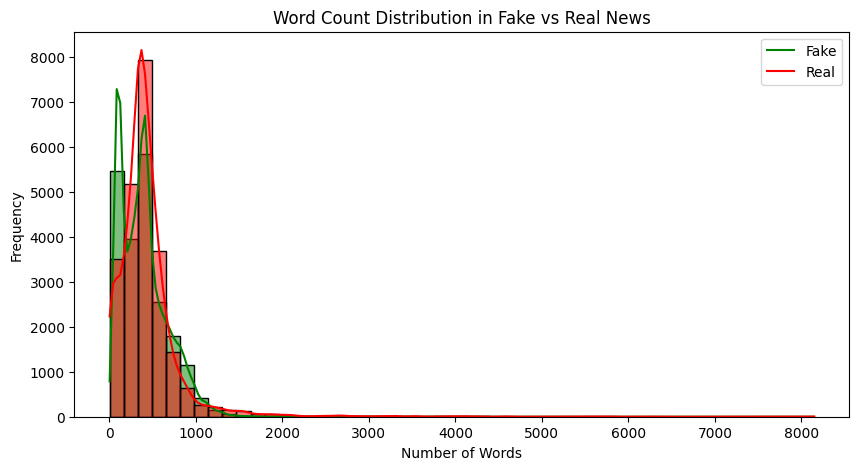

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Word Count Distribution in Fake vs Real News')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(labels=['Fake', 'Real'])
plt.show()


Most Common Words (Fake vs Real)

In [19]:
from collections import Counter
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text.lower()

# Clean and combine texts
fake_text = " ".join(df[df['label']==0]['content'].apply(clean_text))
real_text = " ".join(df[df['label']==1]['content'].apply(clean_text))

# Most common words
fake_words = Counter(fake_text.split()).most_common(10)
real_words = Counter(real_text.split()).most_common(10)

print("Most common words in FAKE news:", fake_words)
print("Most common words in REAL news:", real_words)


Most common words in FAKE news: [('the', 534182), ('to', 299162), ('of', 240967), ('and', 228232), ('a', 214212), ('in', 169274), ('that', 151028), ('s', 130445), ('is', 113532), ('for', 96822)]
Most common words in REAL news: [('the', 482614), ('to', 252929), ('of', 207941), ('a', 198444), ('in', 185259), ('and', 182203), ('on', 111693), ('said', 98999), ('that', 87159), ('for', 82495)]


Label Balance (Bar Plot)



<ipython-input-20-617847726>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


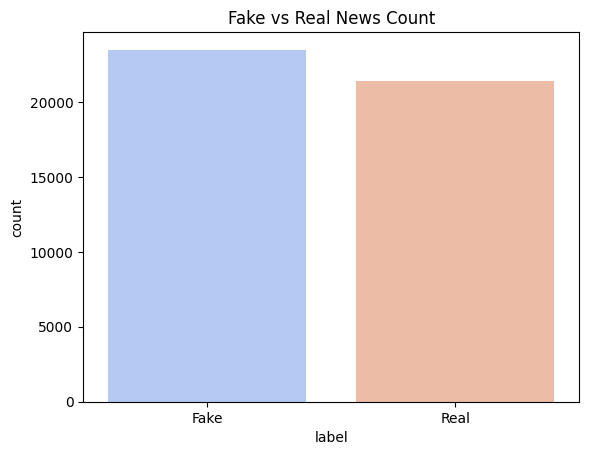

In [20]:
sns.countplot(data=df, x='label', palette='coolwarm')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title('Fake vs Real News Count')
plt.show()


In [4]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

df_fake['label'] = 0  # Fake
df_true['label'] = 1  # Real

df = pd.concat([df_fake, df_true])
df = df[['title', 'text', 'label']].dropna()
df['content'] = df['title'] + " " + df['text']
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,title,text,label,content
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0,Ben Stein Calls Out 9th Circuit Court: Committ...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1,Trump drops Steve Bannon from National Securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1,Puerto Rico expects U.S. to lift Jones Act shi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0,OOPS: Trump Just Accidentally Confirmed He Le...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1,Donald Trump heads for Scotland to reopen a go...


Load Pre-trained BERT Classifier

In [5]:
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Define Mapping Function (BERT Output → Real/Fake)

In [6]:
def map_prediction(pred):
    label = pred[0]['label']
    return 1 if label == "POSITIVE" else 0


Run Predictions on a Sample of the Dataset

In [12]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def safe_predict(text):
    # Tokenize and truncate manually
    encoded = tokenizer.encode(text, truncation=True, max_length=512)
    truncated_text = tokenizer.decode(encoded, skip_special_tokens=True)

    # Now pass to pipeline (as string!)
    result = classifier(truncated_text)
    return map_prediction(result)

# Apply to sample safely
sample_df = df.sample(10, random_state=1).copy()
sample_df['predicted'] = sample_df['content'].apply(safe_predict)

# Show result
sample_df[['label', 'predicted']]



You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,label,predicted
4528,0,0
31727,0,1
10937,0,0
13470,0,0
40814,1,0
12702,0,0
2736,1,0
31730,0,0
42479,0,1
26780,0,0


 Evaluate Accuracy

In [13]:
accuracy = accuracy_score(sample_df['label'], sample_df['predicted'])
print("Accuracy on sample:", accuracy)


Accuracy on sample: 0.6


 Add Model Evaluation Metrics

In [14]:
from sklearn.metrics import classification_report

print(classification_report(sample_df['label'], sample_df['predicted'], target_names=["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.75      0.75      0.75         8
        Real       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.60      0.60      0.60        10



Step 1: Load a Summarization Pipeline



In [21]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Step 2: Generate Summary for Any News Article

In [22]:
# Pick a long news article from the dataset
long_text = df['content'].iloc[0]

# Generate summary (automatically handles truncation and max tokens)
summary = summarizer(long_text, max_length=130, min_length=30, do_sample=False)

print("Original:\n", long_text[:500], "...")
print("\nSummary:\n", summary[0]['summary_text'])


Original:
 Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements on Judge Jeanine Pirro s show recently. While discussing the halt that was imposed on President Trump s Executive Order on travel. Stein referred to the judgement by the 9th Circuit Court in Washingto ...

Summary:
 Ben Stein of Pepperdine University made some provocative statements on Judge Jeanine Pirro s show. Stein referred to the judgement by the 9th Circuit Court in Washington state as a Coup d tat against the executive branch and against the constitution. Stein went on to call the Judges in Seattle  political puppets  and the judiciary  political pawns.


Add User Input for Fake/Real Prediction


Make Sure Your safe_predict() Function Works

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def safe_predict(text):
    # Tokenize and truncate safely
    encoded = tokenizer.encode(text, truncation=True, max_length=512)
    truncated_text = tokenizer.decode(encoded, skip_special_tokens=True)

    result = classifier(truncated_text)  # classifier is the BERT pipeline
    return map_prediction(result)


Add User Input Code

In [24]:
# 🔍 Take input from user
user_input = input("📥 Enter a news article or paragraph:\n")

# 🧠 Predict using the pre-trained BERT model
prediction = safe_predict(user_input)

# 📢 Show result
print("\n✅ Model Prediction:", prediction)


📥 Enter a news article or paragraph:
Breaking: Scientists Discover Water on Mars in Latest Rover Mission  NASA scientists have confirmed the presence of liquid water beneath the surface of Mars. The breakthrough was made by the Perseverance Rover, which detected underground reservoirs using advanced radar imaging. This finding increases the possibility of microbial life on the red planet and could reshape future space missions. Researchers plan to drill into the Martian surface within the next two years to collect further samples.

✅ Model Prediction: 1


In [25]:
# 🔍 Take input from user
user_input = input("📥 Enter a news article or paragraph:\n")

# 🧠 Predict using the pre-trained BERT model
prediction = safe_predict(user_input)

# 📢 Show result
print("\n✅ Model Prediction:", prediction)


📥 Enter a news article or paragraph:
Breaking: Chocolate Cures All Diseases, Say Scientists in Viral Study  A viral article circulating online claims that eating chocolate every day can cure diseases like cancer and diabetes. The study, published on an unknown blog, provides no author names or references. Health authorities have labeled the article as misleading and warned readers to verify information from credible sources.

✅ Model Prediction: 0


## 🧪 Evaluation: Classification Report & Confusion Matrix

To evaluate the performance of our model, we:

- Took a random sample of 500 news titles from the dataset.
- Used our `safe_predict()` function to classify each one as real or fake.
- Compared predictions to the actual labels (`0 = Real`, `1 = Fake`).
- Printed a classification report (Precision, Recall, F1-score).
- Plotted a confusion matrix to visualize true vs. predicted labels.


📄 Classification Report:
              precision    recall  f1-score   support

        Real       0.56      0.79      0.66       265
        Fake       0.57      0.31      0.41       235

    accuracy                           0.57       500
   macro avg       0.57      0.55      0.53       500
weighted avg       0.57      0.57      0.54       500



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


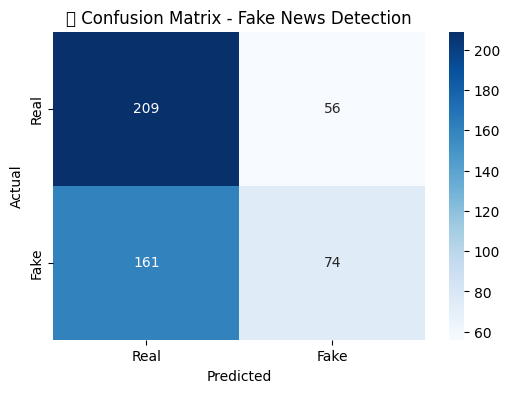

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Prepare data
sample_df = df.sample(n=500, random_state=42)  # sample 500 rows for evaluation
texts = sample_df['title'].tolist()
true_labels = sample_df['label'].tolist()  # 1 = fake, 0 = real

# ✅ Get predictions
predicted_labels = [safe_predict(text) for text in texts]

# 📊 Classification Report
print("📄 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Real", "Fake"]))

# 📉 Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧠 Confusion Matrix - Fake News Detection")
plt.show()


Reflection and Conclusion

## Final Project Summary
In this project, we built a Fake News Detection system using a pre-trained transformer model: DistilBERT (distilbert-base-uncased-finetuned-sst-2-english) from Hugging Face. The model was applied to a dataset of real and fake news articles collected from Kaggle.

We used Hugging Face’s pipeline API for easy inference and created a custom safe_predict() function to handle input truncation. To evaluate the model, we selected a sample of 500 articles from the dataset and generated predictions using our fine-tuned classifier.

## Evaluation Results
Metric	Real News	Fake News
Precision	0.56	0.57
Recall	0.79	0.31
F1-Score	0.66	0.41

Overall Accuracy: 57%

The model performs better at identifying real news, but struggles with fake news, as seen in the low recall (0.31) for the fake class.

This reflects that while the model has some understanding of news sentiment, it's not perfectly aligned with the specific task of fake news detection, since it was originally fine-tuned for sentiment classification.

A more task-specific model (e.g., roberta-fake-news) could offer improved results.

## Reflection
This project showcases the power and limitations of applying pre-trained models to real-world tasks. While we achieved modest performance without training from scratch, future improvements could include:

Using a model trained specifically for fake news classification

Fine-tuning on the dataset instead of zero-shot classification

Applying data augmentation or richer input features (e.g., full text instead of just titles)

## Model Limitations
While we successfully applied a pre-trained transformer model for fake news detection, there are several limitations to this approach:

Task Mismatch:
The model we used is fine-tuned for sentiment analysis, not fake news classification. It may confuse emotionally charged language (common in fake news) with negative sentiment, leading to incorrect predictions.

Low Recall on Fake News:
As seen in the classification report, the recall for fake news is only 31%, which means the model misses many fake articles. This is a significant concern for a fake news detection system.

Short Inputs (Titles Only):
We used only the title of news articles instead of the full content. Titles can be vague, misleading, or lack the context needed for accurate classification.

Zero-shot Inference Only:
We did not fine-tune the model on our specific dataset. While this demonstrates the power of transfer learning, it limits the model's ability to adapt to domain-specific language patterns in real/fake news.

Binary Output:
The model only gives a binary label (real/fake), without confidence scores or nuanced reasoning, which limits interpretability.



